In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline,KroghInterpolator

online_data=pd.read_excel("../../data/pCA_timeseries/Coumaric acid fermentation data for Paul van Lent.xlsx",sheet_name=3,header=2)

Text(0.5, 1.0, 'Feeding strategy')

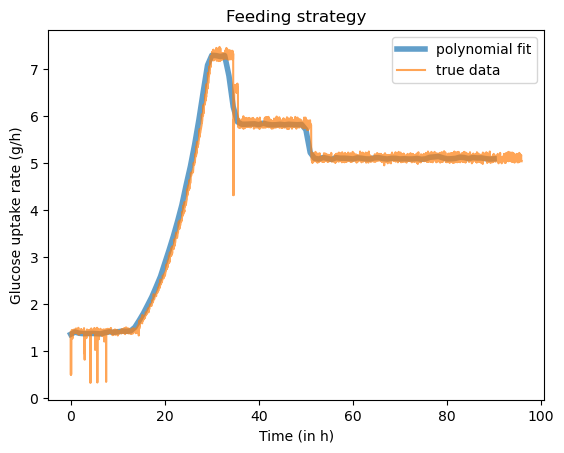

In [37]:
#remove the last na value
glucose_feed=online_data['Rate feed C (carbon source) (g/h)'].values[:-1]
t=online_data['Age (h)'].values[:-1]





def glucose_rate_polynomial_approximation(t,y,N):
    """Polynomial approximation of the time series data."""


    #specific for this problem we know the initial feed rate is 1.4, and the 0s in the beginning should be ignored
    y[y<=0.2]=1.4
    convolved_y=np.convolve(y,np.ones(N)/N,mode='valid')
    cs=CubicSpline(t[:len(convolved_y)],convolved_y)
    return cs

cs=glucose_rate_polynomial_approximation(t,glucose_feed,40) #works until 92 hours



time=np.linspace(0,90,100)
# plt.plot(time,p(time),linewidth=4,alpha=0.7)
plt.plot(time,cs(time),linewidth=4,alpha=0.7,label="polynomial fit")
plt.plot(t[0:len(glucose_feed)],glucose_feed,alpha=0.7, label="true data")
plt.legend()
plt.xlabel("Time (in h)")
plt.ylabel("Glucose uptake rate (g/h)")
plt.title("Feeding strategy")

In [38]:
cs.integrate(0,95)

array(434.51970629)

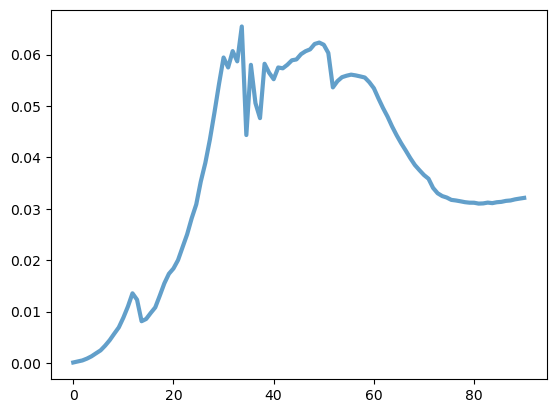

In [39]:

oxygen=online_data['Actual oxygen uptake rate (mol/h)'].values[:2869]
t=online_data['Age (h)'].values[:2869]

def oxygen_uptake_polynomial_approximation(t,y,N):
    """Polynomial approximation of the time series data."""
    #specific for this problem we know the initial feed rate is 1.4, and the 0s in the beginning should be ignored
    convolved_y=np.convolve(y,np.ones(N)/N,mode='valid')
    cs=CubicSpline(t[:len(convolved_y)],convolved_y)
    return cs


cs=oxygen_uptake_polynomial_approximation(t,oxygen,3)

time=np.linspace(0,90,100)

plt.plot(time,cs(time),linewidth=3,alpha=0.7)
# plt.scatter(t,oxygen,alpha=0.7)



Text(0.5, 1.0, 'Broth weight')

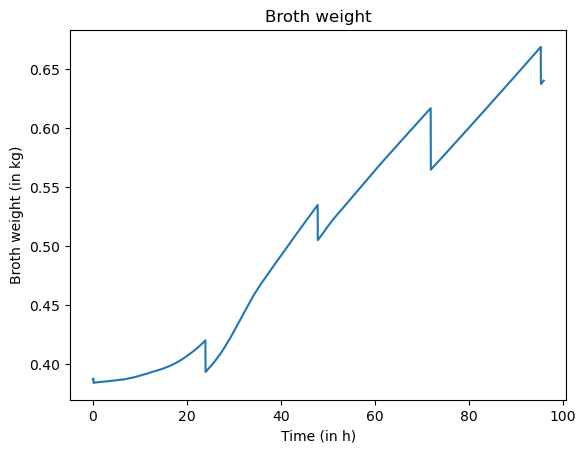

In [40]:
plt.plot(online_data['Age (h)'],online_data['Actual broth weight (kg)'])
plt.xlabel("Time (in h)")
plt.ylabel("Broth weight (in kg)")
plt.title("Broth weight")

Text(0.5, 1.0, 'Oxygen concentration in broth')

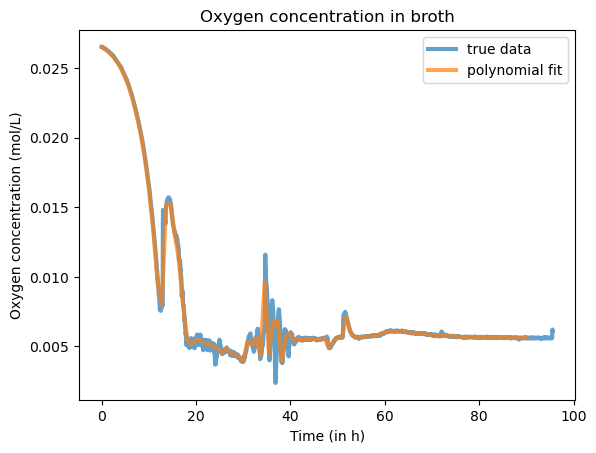

In [41]:
oxygen=online_data['Dissolved oxygen (%)'].values[:2869]*0.00028 #mmol/L
t=online_data['Age (h)'].values[:2869]

def oxygen_uptake_polynomial_approximation(t,y,N):
    """Polynomial approximation of the time series data."""
    #specific for this problem we know the initial feed rate is 1.4, and the 0s in the beginning should be ignored
    convolved_y=np.convolve(y,np.ones(N)/N,mode='valid')
    cs=CubicSpline(t[:len(convolved_y)],convolved_y)
    return cs


cs=oxygen_uptake_polynomial_approximation(t,oxygen,5)
plt.plot(t,oxygen,linewidth=3,alpha=0.7,label='true data')
plt.plot(time,cs(time),linewidth=3,alpha=0.7,label="polynomial fit")
plt.legend()
plt.ylabel("Oxygen concentration (mol/L)")
plt.xlabel("Time (in h)")
plt.title("Oxygen concentration in broth")

Text(0.5, 0, 'Time (in h)')

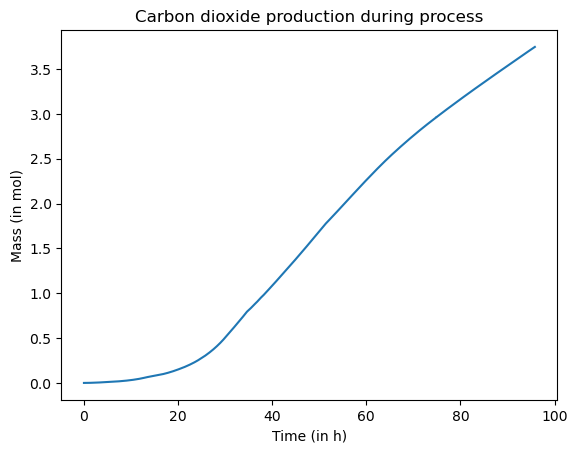

In [42]:
co2=online_data['Actual CO2 production rate (mol/h)'].values[:-2]
t=online_data['Age (h)'].values[:-2]
# plt.plot(t,co2)


co2=online_data['cum. actual carbondioxide production (mol)'].values[:-2]
t=online_data['Age (h)'].values[:-2]
plt.plot(t,co2)
plt.title("Carbon dioxide production during process")
plt.ylabel("Mass (in mol)")
plt.xlabel("Time (in h)")
# cs=oxygen_uptake_polynomial_approximation(t,co2,3)


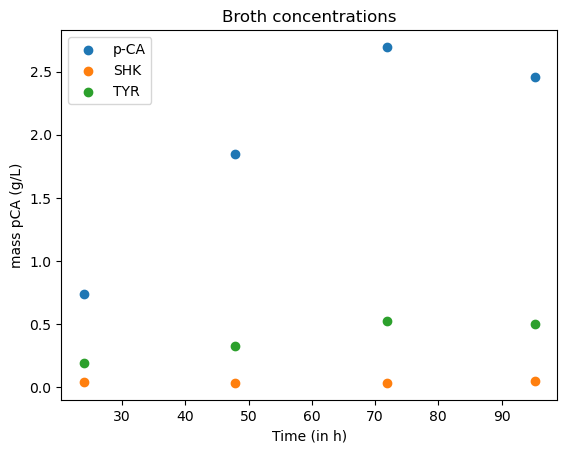

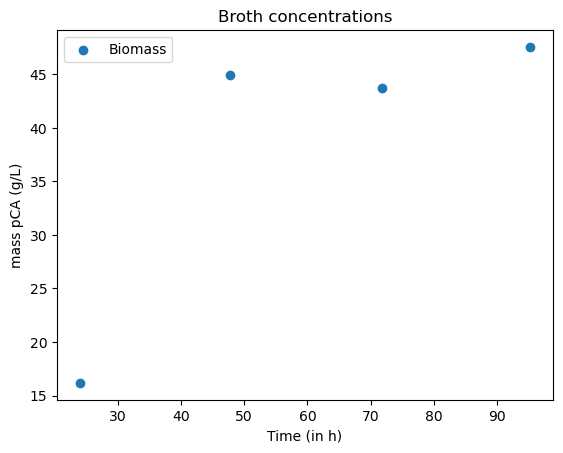

In [43]:
offline_data=pd.read_excel("../../data/pCA_timeseries/Coumaric acid fermentation data for Paul van Lent.xlsx",sheet_name=2,header=2).iloc[0:4,:]
plt.scatter(offline_data['Age (h)'],offline_data['Broth concentration coumaric acid (mg/L)']/1000, label='p-CA')
plt.scatter(offline_data['Age (h)'],offline_data['Broth concentration shikimic acid (mg/L)']/1000,label="SHK")
plt.scatter(offline_data['Age (h)'],offline_data['Broth concentration tyrosine (mg/L)']/1000,label="TYR")
# plt.scatter(offline_data['Age (h)'],offline_data['Biomass  (g/kg)'],label="Biomass")

plt.ylabel("mass pCA (g/L)")
plt.legend()
plt.xlabel("Time (in h)")
plt.title("Broth concentrations")
plt.show()

plt.scatter(offline_data['Age (h)'],offline_data['Biomass  (g/kg)'],label="Biomass")

plt.ylabel("mass pCA (g/L)")
plt.legend()
plt.xlabel("Time (in h)")
plt.title("Broth concentrations")
plt.show()

In [44]:
# offline_data=pd.read_excel("data/Coumaric acid fermentation data for Paul van Lent.xlsx",sheet_name=2,header=2)



import numpy as np
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]



offline_data=pd.read_excel("../../data/pCA_timeseries/Coumaric acid fermentation data for Paul van Lent.xlsx",sheet_name=2,header=2).iloc[0:4,:]
#let us only save on time column
time=offline_data['Age (h)'].dropna()


print(find_nearest(t,time[0]))
print(find_nearest(t,time[1]))
print(find_nearest(t,time[2]))
print(find_nearest(t,time[3]))

offline_data['Biomass  (g/kg)']





23.968611110933125
47.80444444343448
71.83999999891967
95.27555555664003


0    16.18
1    44.92
2    43.70
3    47.56
Name: Biomass  (g/kg), dtype: float64

In [45]:
mets=['GLUC','SHK',"TYR",'PHE','CIN','PCA','CO2','BIOMASS']


t=offline_data['Age (h)'].values
glucose=offline_data['Substrate (glucose) concentration (g/kg)'].values
shk=offline_data['Broth concentration shikimic acid (mg/L)'].values/1000
tyr=offline_data['Broth concentration tyrosine (mg/L)'].values/1000
#phenylalanine and cinnamate we do not have values for
pca=offline_data['Broth concentration coumaric acid (mg/L)'].values/1000

# co2 we should have percentage data for?
#nh3 is fed and should be added to the modelling structure as an extra feeding rate.
biomass=offline_data['Biomass  (g/kg)'].values


fermentation_data=np.zeros((len(time)+1,len(mets)))
fermentation_data[:]=np.nan


t=np.insert(t,obj=0,values=0)
timeseries=pd.DataFrame(fermentation_data,columns=mets,index=t)

timeseries['GLUC'][1:]=glucose
timeseries['SHK'][1:]=shk
timeseries['TYR'][1:]=tyr
timeseries['PCA'][1:]=pca
timeseries['BIOMASS'][1:]=biomass

timeseries.iloc[0,0]=0.0
timeseries.iloc[0,1]=0.0
timeseries.iloc[0,2]=0.0
timeseries.iloc[0,3]=0.0
timeseries.iloc[0,4]=0.0
timeseries.iloc[0,5]=0.0
timeseries.iloc[0,6]=0.0
# timeseries.iloc[0,7]=20.0
timeseries.iloc[0,7]=0.01


co2=online_data['cum. actual carbondioxide production (mol)'][:-2]
co2.index=online_data['Age (h)'].values[:-2]
co2=co2.sample(60)
# timeseries.T.to_csv("../../data/pCA_timeseries/pCA_fermentation_data_200424.csv")


## Construct fermentation dataset for fitting


In [46]:
timeseries=pd.merge(timeseries, co2, left_index=True, right_index=True, how='outer')
timeseries['CO2']=timeseries['cum. actual carbondioxide production (mol)']
timeseries=timeseries.drop(labels="cum. actual carbondioxide production (mol)",axis=1)
timeseries.iloc[0,:-1]=0.0



In [47]:
timeseries.max()-timeseries.min()

GLUC        0.000000
SHK         0.051000
TYR         0.526000
PHE         0.000000
CIN         0.000000
PCA         2.696000
CO2         3.725748
BIOMASS    47.550000
dtype: float64

In [48]:
timeseries.T.to_csv("../../data/pCA_timeseries/pCA_fermentation_data_200424.csv")

In [49]:
timeseries

,GLUC,SHK,TYR,PHE,CIN,PCA,CO2,BIOMASS
0.000000,0.0,0.000,0.000,0.0,0.0,0.000,0.000000,0.01
4.133611,NaN,NaN,NaN,NaN,NaN,NaN,0.007468,NaN
4.433611,NaN,NaN,NaN,NaN,NaN,NaN,0.008160,NaN
5.867222,NaN,NaN,NaN,NaN,NaN,NaN,0.012296,NaN
6.067222,NaN,NaN,NaN,NaN,NaN,NaN,0.012934,NaN
...,...,...,...,...,...,...,...,...
89.275000,NaN,NaN,NaN,NaN,NaN,NaN,3.508857,NaN
92.675278,NaN,NaN,NaN,NaN,NaN,NaN,3.632928,NaN
95.042222,NaN,NaN,NaN,NaN,NaN,NaN,3.718574,NaN
95.242222,NaN,NaN,NaN,NaN,NaN,NaN,3.725748,NaN
